In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


2022-12-16 03:33:33.491533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 03:33:34.321100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-16 03:33:34.321184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-16 03:33:34.321194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [2]:
data = pd.read_csv('../00_source_data/yelp.csv', encoding='latin-1',header=None)
data.columns = ['label','text']
data.head()

,label,text
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [3]:
data['sentiment'] = data['label'].apply(lambda x:'Positive' if x==2 else 'Negative')

In [4]:
sentiment_label = data['sentiment'].factorize()
sentiment_label

(array([0, 1, 0, ..., 1, 1, 1]),
 Index(['Positive', 'Negative'], dtype='object'))

In [5]:
train_x, test_x, train_y, test_y = train_test_split(data['text'], sentiment_label[0], test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
yelp = train_x.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(yelp)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(yelp)
padded_sequence = pad_sequences(encoded_docs, maxlen=20)

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=20) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            1849056   
                                                                 
 spatial_dropout1d (SpatialD  (None, 20, 32)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,865,707
Trainable params: 1,865,707
Non-trainable params: 0
______________________________________________

2022-12-16 03:33:40.159660: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-16 03:33:40.159693: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 03:33:40.159715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-6e26f2): /proc/driver/nvidia/version does not exist
2022-12-16 03:33:40.159979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
history = model.fit(padded_sequence,train_y,
                  validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
760/760 [==============================] - 17s 19ms/step - loss: 0.5075 - accuracy: 0.7451 - val_loss: 0.4154 - val_accuracy: 0.8117
Epoch 2/10
760/760 [==============================] - 14s 19ms/step - loss: 0.4012 - accuracy: 0.8183 - val_loss: 0.4016 - val_accuracy: 0.8163
Epoch 3/10
760/760 [==============================] - 14s 18ms/step - loss: 0.3710 - accuracy: 0.8359 - val_loss: 0.4027 - val_accuracy: 0.8160
Epoch 4/10
760/760 [==============================] - 14s 18ms/step - loss: 0.3487 - accuracy: 0.8469 - val_loss: 0.4001 - val_accuracy: 0.8163
Epoch 5/10
760/760 [==============================] - 14s 18ms/step - loss: 0.3338 - accuracy: 0.8537 - val_loss: 0.4029 - val_accuracy: 0.8171
Epoch 6/10
760/760 [==============================] - 14s 18ms/step - loss: 0.3200 - accuracy: 0.8589 - val_loss: 0.4201 - val_accuracy: 0.8176
Epoch 7/10
760/760 [==============================] - 14s 18ms/step - loss: 0.3087 - accuracy: 0.8652 - val_loss: 0.4194 - val_accuracy:

In [9]:
test_pred = tokenizer.texts_to_sequences(test_x.values)
test_pred = pad_sequences(test_pred,maxlen=20)
test_pred = model.predict(test_pred).round()

238/238 [==============================] - 1s 3ms/step


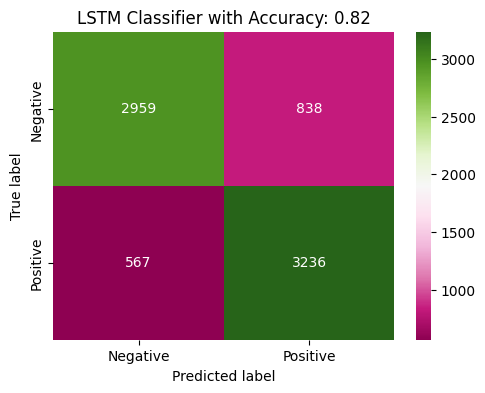

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
# plot confusion matrix
cm = confusion_matrix(test_y, test_pred)
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap="PiYG")
plt.title('LSTM Classifier with Accuracy: {0:.2f}'.format(accuracy_score(test_y, test_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# save plot to file
plt.savefig('../30_results/LSTM_real_data.png')

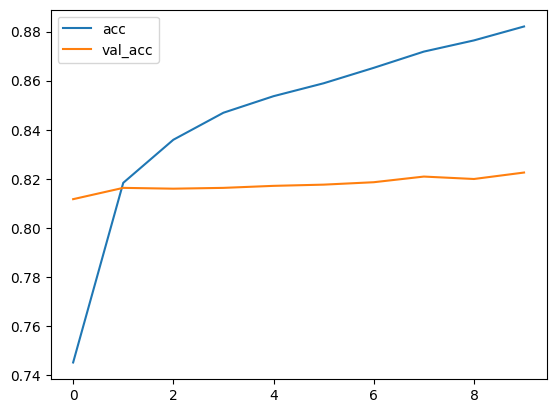

In [11]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.savefig('../30_results/LSTM_acc.png')
plt.show()

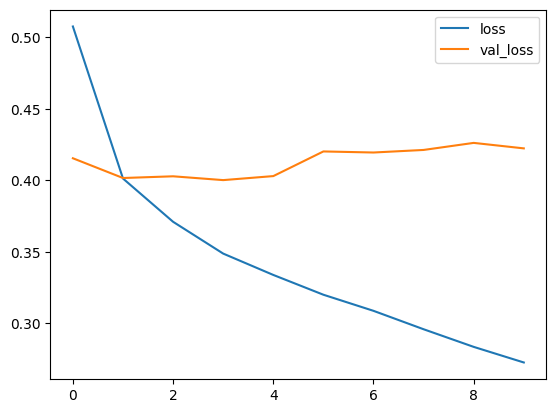

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('../30_results/LSTM_loss.png')
plt.show()